In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env_hard as solitaire_env_hard
import sys
import seaborn as sns
import pickle as pkl
import gp
import test_env
import tqdm.notebook as tq
#sys.setrecursionlimit(10**6)

In [4]:
with open("games/run_hardgame_2020-05-30 00:48:11.622367.pkl","rb") as file:
    run_data = pkl.load(file)

In [5]:
actions_matrix = run_data['actions_matrix']

In [6]:
iterations_used_per_game = run_data['iterations_used_per_game']
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [7]:
iterations_used_per_game = run_data['iterations_used_per_game']
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [8]:
max_action_take = max(it.index)
max_action_take 

2670

### Game that resulted into victory with longest action sequence

In [10]:
longest_action_seq_win_gno = None
longest_action_seq_win_start_state = None
longest_action_seq_win_steps = 0
longest_action_seq_win_action_description = None
longest_action_seq_win_action_sequence = None
for game,actions,end_state,start_state,game_states,reason,action_description in actions_matrix:
    
    if reason =='won' and len(actions) > longest_action_seq_win_steps:
        
        longest_action_seq_win_steps = len(actions)
        longest_action_seq_win_gno = game
        
        longest_action_seq_win_start_state = start_state
        longest_action_seq_win_action_sequence = actions
        longest_action_seq_win_action_description = action_description
        
        
print(longest_action_seq_win_gno,longest_action_seq_win_steps)

254 2670


### Frequency of actions in the longest sequence won game

In [8]:
"".join([str(x) for x in longest_action_seq_win_action_sequence])

'233222222333322223555553223335555555531123332201112111311134414441144415141411511114451111444141444141415114441414441144144411144414441114441511111111444411511444141441441511144144414144414141144441411445111111114441151444444111411144411511144441141511444141441441511114441414441414441414144411114115111144414441411151111444144115111144144411414441414144415111111444451114441144414411511144441411144441441414441441144111151111444141444141441151111444144411511144444111415114441444141141151144414144411451111444141444141511113441444114144414141444151111114441544411444411144414441411444141151111114441415114444115114441444111444411444114414414115111144414144414441114114444111144414441151111114441414414414411511144414414414115111444411411441511144414441144441114114115114444114144414114444141114414451445111144414145111111144414144415111111444411514441411444411444141411144144441411144144141455111111114441154441144441114441144411144414415111111444144444511111114441444151114444141144414511111444411

In [9]:
action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
for a in longest_action_seq_win_action_sequence:
    action_freq[a]+=1

In [10]:
action_idx2des = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }

In [11]:
dic_items = list(action_freq.items())
dic_items.sort(key = lambda x:x[1])
keys = [action_idx2des[x[0]] for x in dic_items]
values = [x[1] for x in dic_items]

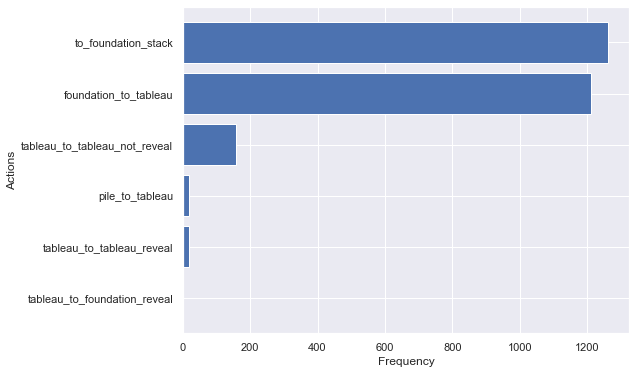

In [12]:
sns.set()
fig,ax = plt.subplots()
d = pd.DataFrame(data={"action":keys,"frequency":values})
ax.barh(width = 'frequency', y= 'action',data = d)
ax.set_yticks(d['action'])
fig.set_figheight(6)
fig.set_figwidth(8)
ax.set_xlabel("Frequency")
ax.set_ylabel("Actions")
plt.show()

In [13]:
assert(len(longest_action_seq_win_action_description)==len(longest_action_seq_win_action_sequence))

### Verify longest sequence won game

In [14]:
env = test_env.TestEnv(longest_action_seq_win_start_state)
won = False
for i,action_data in enumerate(longest_action_seq_win_action_description):
    
    action_type = action_data[0]
    
    won,taken = env.step(action=action_type,debug=False,action_data=action_data)
    if taken == False:
        
        print("verifier failed",action_data)
        
        break
        
print(won,i)
    

True 2669


The test environment too results into terminal state for the longest sequence game that was won

### Verify each game

In [15]:
cnt = 0
for game,action_seq,end_state,start_state,game_states,reason,action_description in actions_matrix:
    if reason =='won':
        en = test_env.TestEnv(start_state)
        for k in range(len(action_seq)):
            
            action_data = action_description[k]
            action = action_data[0]
            #print("action type ",k,action,actions_seq[0][k])
            w,t = en.step(action,False,action_data)

            if t == False:
                print("action not taken",game,k)
                break
                
            if w == True:
                cnt+=1
print(cnt)

216


In [62]:
en = test_env.TestEnv(start_state)
k = -1

In [25]:
def goto_next_state():
    
    k +=1 

    action_data = action_description[k]
    action = action_data[0]
    print("action type ",k,action,action_seq[k])

    if action !=action_seq[k]:
        print("False")

    w,t = en.step(action,False,action_data)
    print(w,t)


    en.get_pile()
    print("************************************************************************************************")
    en.get_foundation()
    print("**************************************************************************************************")
    en.get_tableau()